## Ok Cupid Analysys
- data https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles
- credits https://github.com/gkar90/OKCupid-Project/blob/main/date-a-scientist.ipynb

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/okcupid_profiles.csv')
df.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN


### A quick look

In [3]:
df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [5]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### Descriptive Statistics - Continuous Variables

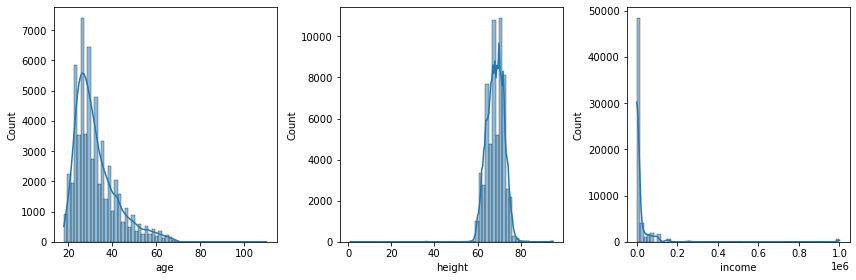

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axes = plt.subplots(1, 3, figsize=(12,4))

sns.histplot(df.age, kde=True, bins = 60, ax=axes[0])
sns.histplot(df.height, kde=True, bins = 60, ax=axes[1])
sns.histplot(df.income,kde=True, bins = 60, ax=axes[2])

plt.tight_layout()
plt.show()

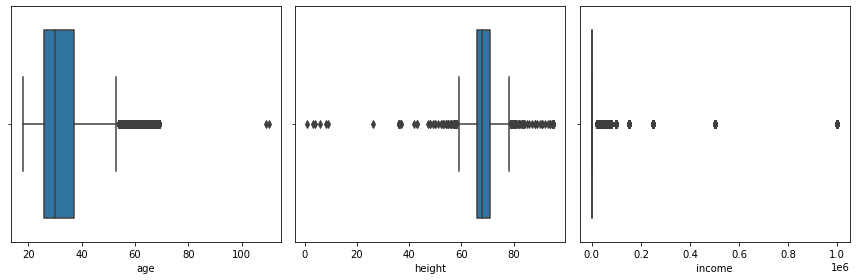

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axes = plt.subplots(1, 3, figsize=(12,4))

sns.boxplot(x=df.age, ax=axes[0])
sns.boxplot(x = df.height, ax=axes[1])
sns.boxplot(x = df.income, ax=axes[2])

plt.tight_layout()
plt.show()

### AGE

In [8]:
df.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [9]:
df[df.sex == 'f'].age.describe()

count    24117.000000
mean        32.818220
std         10.025385
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [10]:
df[df.sex == 'm'].age.describe()

count    35829.000000
mean        32.018588
std          9.032881
min         18.000000
25%         26.000000
50%         30.000000
75%         36.000000
max        109.000000
Name: age, dtype: float64

In [11]:
df.groupby('sex')['age'].count()

sex
f    24117
m    35829
Name: age, dtype: int64

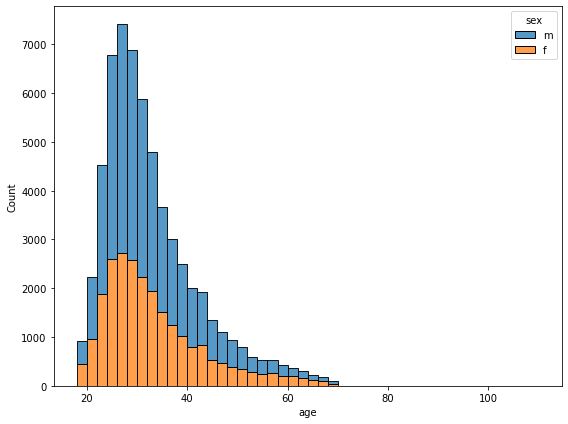

In [12]:
figure, axes = plt.subplots(figsize=(8,6))

ax = sns.histplot(x = df.age, hue = df.sex, binwidth = 2, multiple = 'stack')

plt.tight_layout()
plt.show()

### HEIGHT

In [13]:
df.height.describe()

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

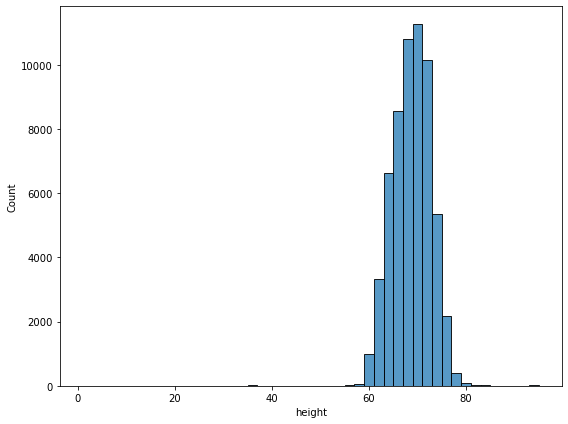

In [14]:
figure, axes = plt.subplots(figsize=(8,6))

ax = sns.histplot(x = df.height, binwidth = 2, multiple = 'stack')

plt.tight_layout()
plt.show()

### INCOME

In [15]:
df.income.describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [16]:
df.groupby('sex')['income'].mean()

sex
f    11181.697392
m    25991.307656
Name: income, dtype: float64

In [17]:
df.groupby('sex')['income'].median()

sex
f   -1.0
m   -1.0
Name: income, dtype: float64

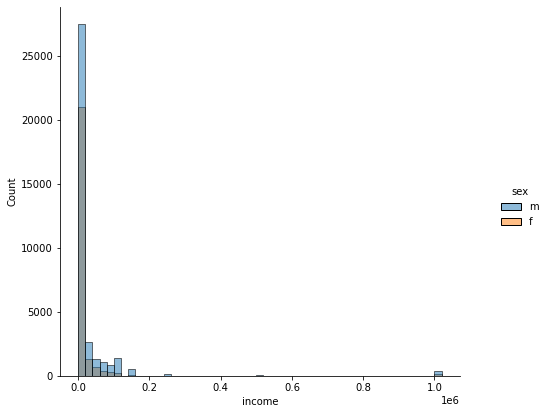

In [19]:
ax = sns.displot(data = df, x = 'income', binwidth = 20000, hue = 'sex')
ax.fig.set_figwidth(8)
ax.fig.set_figheight(6)

In [20]:
#hard to see but can still see average income per sex:

mean_income = np.mean(df.income)

print("Average income: {}".format(round(mean_income, 2)))

#per sex:
sex_avg_income = df.groupby("sex").income.mean()
#print(sex_avg_height)

print("Average income for females is {} while males incomes is {}.".format(
    round(sex_avg_income[0], 2), round(sex_avg_income[1], 2)))


Average income: 20033.22
Average income for females is 11181.7 while males incomes is 25991.31.


In [ ]:
## PAUSE BREAK - based on these results wh should pay on a date? )

### Descriptive Statistics - Discreet/Categorical Variables:

#### SEX

<AxesSubplot:xlabel='sex', ylabel='count'>

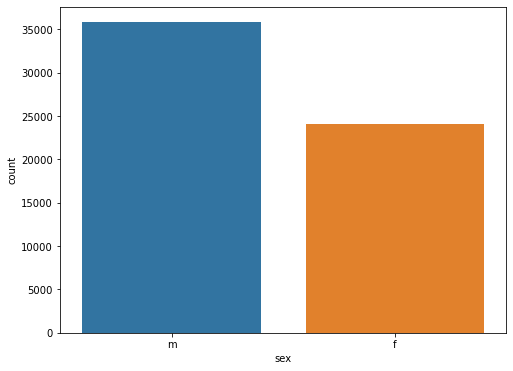

In [21]:
fig = plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'sex')

#### BODY TYPE

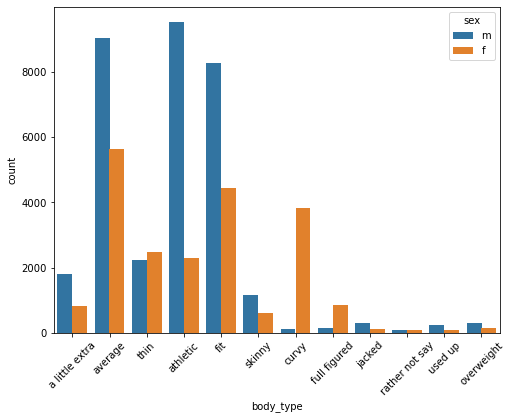

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'body_type', hue = 'sex')
plt.xticks(rotation = 45)
plt.show()

#### OBSERVATIONS -Interesting to see how people label themselves
- Most men are average, athletic, or fit
- Most women are average, thin, athletic, fit, or curvy
- The one that caught my eye is the difference in label between men and women for "a little extra" and "curvy" Men it seems tend to go with "a little extra" instead of using "curvy"

#### DIET

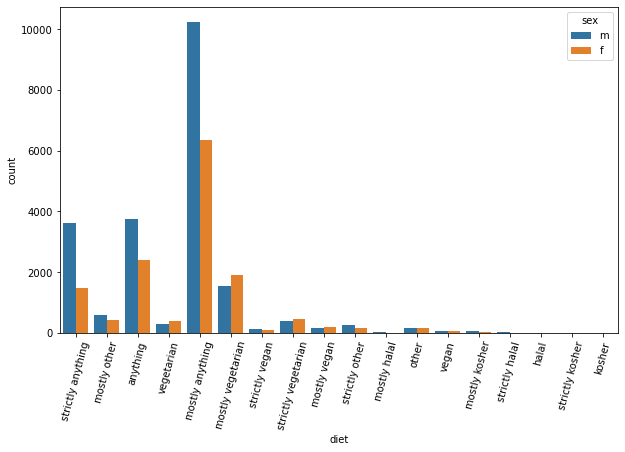

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'diet', hue = 'sex')
plt.xticks(rotation = 75)
plt.show()

#### SIGN

<AxesSubplot:xlabel='sign', ylabel='count'>

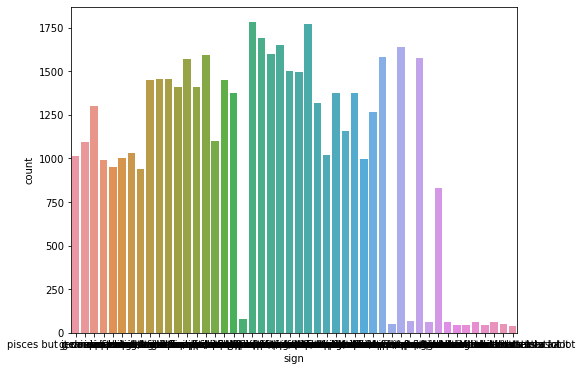

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'sign')

In [ ]:
## Let's correct the x axis

In [29]:
df.sign.value_counts().head(7)

gemini and it&rsquo;s fun to think about     1782
scorpio and it&rsquo;s fun to think about    1772
leo and it&rsquo;s fun to think about        1692
libra and it&rsquo;s fun to think about      1649
taurus and it&rsquo;s fun to think about     1640
cancer and it&rsquo;s fun to think about     1597
pisces and it&rsquo;s fun to think about     1592
Name: sign, dtype: int64

In [32]:
#ok lets separate values into a new column because the values we actually want are just the 
#[0] index of the string 


df['zodiac'] = df.sign.str.split(" ").str.get(0)

df.zodiac.value_counts().head(8)

leo        4374
gemini     4310
libra      4207
cancer     4206
virgo      4141
taurus     4140
scorpio    4134
aries      3989
Name: zodiac, dtype: int64

In [33]:
#after looking at the other columns, tthe religion column stood out as well as needing some cleaning up

df['religion_clean'] = df.religion.str.split(" ").str.get(0)

df.religion_clean.value_counts().head(8)

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
Name: religion_clean, dtype: int64

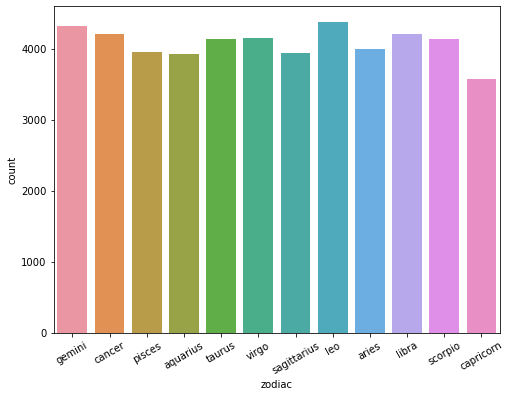

In [34]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'zodiac')
plt.xticks(rotation = 30)
plt.show()

## Modeling / Machine Learning
OK, so let's think about what we can do here. We've got a bunch of dating profiles. We've got a bunch of info on the people in this dataset. one of the basic ones thats asked:

- Can we figure out a persons zodiac sign based off of other features?
Some people don't care for zodiac, some read their horoscopes daily. Let's look at a few variables and see what we can do

There's tons of models and machine learning algorithms out there, but for the purpose of this dataset and for practice, will look at:

- Logistic Regression
- KNeighbors Classification
- Decision Tree Classification

In [41]:
df_new = df[['drinks', 'smokes', 'drugs', 'zodiac']]

In [36]:
df_new.head(3)

,drinks,smokes,drugs,zodiac
0,socially,sometimes,never,gemini
1,often,no,sometimes,cancer
2,socially,no,NaN,pisces


In [42]:
df_new.isna().sum()

drinks     2985
smokes     5512
drugs     14080
zodiac    11056
dtype: int64

In [43]:
df_new.shape

(59946, 4)

In [44]:
## dropna
df_new_clean = df_new.dropna()

In [45]:
df_new_clean.isna().sum()

drinks    0
smokes    0
drugs     0
zodiac    0
dtype: int64

In [46]:
df_new_clean.head(3)

,drinks,smokes,drugs,zodiac
0,socially,sometimes,never,gemini
1,often,no,sometimes,cancer
4,socially,no,never,aquarius


In [47]:
## Get dummies
colums = ['drinks', 'smokes', 'drugs', 'zodiac']

for col in colums[:-1]:
    df_new_clean = pd.get_dummies(df_new_clean, columns = [col], prefix = [col])
    
df_new_clean.shape

(35570, 15)

In [48]:
df_new_clean.head(3)

,zodiac,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,drugs_never,drugs_often,drugs_sometimes
0,gemini,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,cancer,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,aquarius,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [49]:
df_new_clean.zodiac.value_counts()

leo            3160
gemini         3117
cancer         3076
virgo          3074
libra          3050
taurus         3024
scorpio        2992
aries          2925
aquarius       2851
sagittarius    2842
pisces         2814
capricorn      2645
Name: zodiac, dtype: int64

#### LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [52]:
col_length = len(df_new_clean)

X = df_new_clean.iloc[:, 1:col_length]
Y = df_new_clean.iloc[:, 0:1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [53]:
## Ravel It is equivalent to reshape(-1, order=order)
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
x.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [55]:
np.ravel(x, order='F')

array([1, 4, 2, 5, 3, 6])

In [59]:
lr_model = LogisticRegression(multi_class="multinomial")

lr_model.fit(X_train, Y_train)

lr_predictions = lr_model.predict(X_train)

In [60]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00      2260
       aries       0.09      0.03      0.05      2298
      cancer       0.10      0.08      0.09      2452
   capricorn       0.00      0.00      0.00      2110
      gemini       0.09      0.54      0.15      2507
         leo       0.09      0.06      0.07      2523
       libra       0.09      0.05      0.06      2454
      pisces       0.00      0.00      0.00      2253
 sagittarius       0.00      0.00      0.00      2299
     scorpio       0.10      0.12      0.11      2394
      taurus       0.09      0.17      0.12      2485
       virgo       0.07      0.00      0.01      2421

    accuracy                           0.09     28456
   macro avg       0.06      0.09      0.05     28456
weighted avg       0.06      0.09      0.06     28456



#### Model notes
- OK so...that is pretty horrible results. the F1 scores are mostly around or below .1 (meaning 10% accurately predicting our zodiac sign) which is saying our prediction model is pretty inaccurate. Lets try another.

#### K-Nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
kneighbor = KNeighborsClassifier(n_neighbors = 5)

kneighbor.fit(X_train, Y_train)

kn_predictions = kneighbor.predict(X_train)

In [63]:
print(classification_report(Y_train, kn_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.19      0.11      2260
       aries       0.08      0.55      0.14      2298
      cancer       0.09      0.02      0.03      2452
   capricorn       0.08      0.11      0.09      2110
      gemini       0.10      0.04      0.06      2507
         leo       0.21      0.01      0.01      2523
       libra       0.09      0.04      0.05      2454
      pisces       0.12      0.01      0.02      2253
 sagittarius       0.08      0.01      0.01      2299
     scorpio       0.18      0.01      0.02      2394
      taurus       0.10      0.01      0.02      2485
       virgo       0.09      0.04      0.06      2421

    accuracy                           0.08     28456
   macro avg       0.11      0.09      0.05     28456
weighted avg       0.11      0.08      0.05     28456



In [ ]:
## still bad. F1 scores are in the .05 range...half as good as our LR model

#### DECISION TREE

In [64]:
from sklearn.tree import DecisionTreeClassifier


In [65]:
tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)

tree_predictions = tree.predict(X_train)

In [66]:
print(classification_report(Y_train, tree_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.02      0.04      2260
       aries       0.11      0.06      0.07      2298
      cancer       0.11      0.14      0.12      2452
   capricorn       0.17      0.01      0.02      2110
      gemini       0.11      0.06      0.08      2507
         leo       0.09      0.55      0.16      2523
       libra       0.14      0.03      0.05      2454
      pisces       0.13      0.02      0.03      2253
 sagittarius       0.15      0.00      0.01      2299
     scorpio       0.10      0.12      0.11      2394
      taurus       0.12      0.03      0.05      2485
       virgo       0.11      0.10      0.10      2421

    accuracy                           0.10     28456
   macro avg       0.12      0.10      0.07     28456
weighted avg       0.12      0.10      0.07     28456



In [ ]:
## still no good. F1 score of around .06...our model does a bad job at predicting zodiacs 
## based off of drinking, smoking, and drug use

#### 3-PARAMETER MODEL limitations
- 3 parameters was horrible. Lets see if we can change the columns, get new parameters, and run it back

In [67]:
new_df = df[['body_type', 'diet', 'orientation', 'pets', 'sex', 'religion_clean', 'job', 'zodiac']]

new_df_clean = new_df.dropna()

new_df_clean.shape

(16453, 8)

In [68]:
colums1 = ['body_type', 'diet', 'orientation', 'pets', 'sex', 'religion_clean', 'job', 'zodiac']

for col in colums1[:-1]:
    new_df_clean = pd.get_dummies(new_df_clean, columns = [col], prefix = [col])

new_df_clean.head()

,zodiac,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
new_col_len = len(new_df_clean)

X_new = new_df_clean.iloc[:, 1:new_col_len]
Y_new = new_df_clean.iloc[:, 0:1]

X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size = 0.20, random_state = 0)

Y_new_train = Y_new_train.to_numpy().ravel()
Y_new_test = Y_new_test.to_numpy().ravel()

#### K-Neighbor

In [70]:
kneighbor_new = KNeighborsClassifier(n_neighbors = 5)

kneighbor_new.fit(X_new_train, Y_new_train)

kn_predictions_new = kneighbor_new.predict(X_new_train)

In [71]:
print(classification_report(Y_new_train, kn_predictions_new))

              precision    recall  f1-score   support

    aquarius       0.26      0.66      0.37      1031
       aries       0.27      0.53      0.36      1043
      cancer       0.30      0.43      0.35      1190
   capricorn       0.31      0.33      0.32       952
      gemini       0.35      0.30      0.32      1200
         leo       0.40      0.28      0.33      1208
       libra       0.37      0.27      0.31      1090
      pisces       0.41      0.24      0.31      1059
 sagittarius       0.41      0.21      0.28      1051
     scorpio       0.41      0.23      0.30      1072
      taurus       0.41      0.23      0.29      1102
       virgo       0.41      0.26      0.32      1164

    accuracy                           0.33     13162
   macro avg       0.36      0.33      0.32     13162
weighted avg       0.36      0.33      0.32     13162



In [ ]:
## OK now we're in business. The additional parameters has given us a score of 0.33 
## (about 33% accurately predicting a persons Zodiac sign based off of the inputs above)

#### Tree Classifier

In [72]:
tree_new = DecisionTreeClassifier()

tree_new.fit(X_new_train, Y_new_train)

tree_new_predictions = tree_new.predict(X_new_train)

In [73]:
print(classification_report(Y_new_train, tree_new_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.94      0.78      1031
       aries       0.66      0.87      0.75      1043
      cancer       0.69      0.85      0.77      1190
   capricorn       0.74      0.83      0.78       952
      gemini       0.78      0.79      0.78      1200
         leo       0.79      0.80      0.79      1208
       libra       0.78      0.76      0.77      1090
      pisces       0.82      0.73      0.77      1059
 sagittarius       0.91      0.69      0.78      1051
     scorpio       0.87      0.71      0.78      1072
      taurus       0.92      0.70      0.79      1102
       virgo       0.91      0.67      0.77      1164

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.78     13162
weighted avg       0.80      0.78      0.78     13162



#### NOTES 
- Even better! So adding more parameters has increased our likelyhood of predicting Zodiac sign based off other parameters in the description like body type, diet, orientation, pets, sex, job, and religion.
- F1 score of .78 is signficantly better than our 3 parameter model off of drinking, smoking, and drugs (meaning its about 78% accurate).

#### Heatmap Using Our Decision Tree Model

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(Y_new_train, tree_new_predictions)
cm_labels = tree_new.classes_

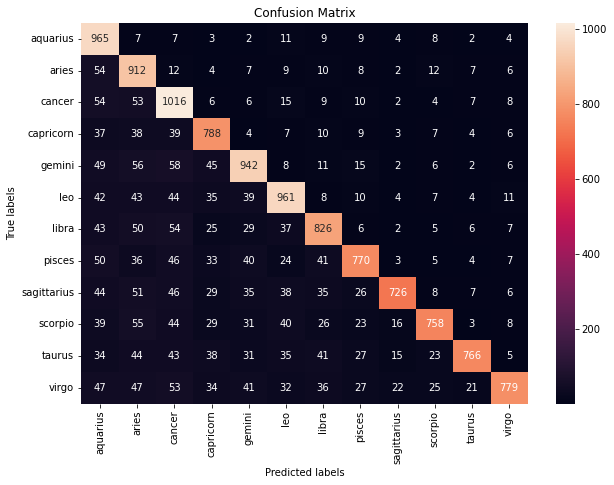

In [76]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_ticklabels(cm_labels); 
ax.yaxis.set_ticklabels(cm_labels);

#### NOTES
- Pretty cool, so it predicted cancer, leo, and aquarius most accurately and was least accurate on scorpio, sagittarius, and taurus.
